# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
#from config import weather_api_key

# Import citipy library - provides geo coordinates for all available cities with population over 500
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes -open interval
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
#This code gives us list of random cities

# Initialize two lists
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#numpy.random.uniform(low=0.0, high=1.0, size=None) - draws samples from uniform distribution- any value within half open interval (lat_range[0], lat_range[0]] is equally likely to be drawn
#lats creates a random list of latitudes
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
#lngs creates a random list of longitudes
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

#Merges the above two lists using zip function-to create an object with lats and longs
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
# for loop looks at the lat_lng list
for lat_lng in lat_lngs:
    #using nearest_city function of citipy library 
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#city.city_name

592

In [4]:
cities

['nikolskoye',
 'sentyabrskiy',
 'taoudenni',
 'upernavik',
 'lasa',
 'klaksvik',
 'saint-philippe',
 'miri',
 'marcona',
 'taolanaro',
 'thinadhoo',
 'dunedin',
 'qaanaaq',
 'bredasdorp',
 'plouzane',
 'nguruka',
 'saleaula',
 'busselton',
 'rikitea',
 'new norfolk',
 'hermanus',
 'la palma',
 'tuatapere',
 'kandrian',
 'samusu',
 'glyadyanskoye',
 'ponta do sol',
 'kilinochchi',
 'souillac',
 'constitucion',
 'gombong',
 'bluff',
 'iquique',
 'ushuaia',
 'kruisfontein',
 'dikson',
 'mount gambier',
 'tuktoyaktuk',
 'moshupa',
 'nizhneyansk',
 'namibe',
 'kapaa',
 'chokurdakh',
 'norman wells',
 'east london',
 'tarnogskiy gorodok',
 'kamina',
 'hualmay',
 'carnarvon',
 'puerto ayora',
 'ribeira grande',
 'port hardy',
 'guerrero negro',
 'avarua',
 'havoysund',
 'port alfred',
 'vila franca do campo',
 'saint anthony',
 'makakilo city',
 'mpanda',
 'jamestown',
 'mys shmidta',
 'port blair',
 'hithadhoo',
 'artyshta',
 'bonthe',
 'punta arenas',
 'russell',
 'atuona',
 'bandarbeyla',

In [31]:
url="http://api.openweathermap.org/data/2.5/weather?"

#Standard units are in Kelvin-https://openweathermap.org/weather-data
units="metric"

#Build query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [1]:
cities=["New York", "London","Boslo Fake City","Moscow","Beijing"]

dt=[]
country=[]
lat=[]
lng=[]
cloud=[]
humidity=[]
temp_max=[]
windspeed=[]
print(cities)

['New York', 'London', 'Fake City', 'Moscow', 'Beijing']


In [30]:
for city in cities:
    url= query_url + city
    #print(city)
    time.sleep(1)
    try:
        response=requests.get(url).json()
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lng"])
        country.append(response["sys"]["country"])
        dt.append(response["dt"])
        temp_max.append(response["main"]["temp_max"])
        cloud.append(response["clouds"]["all"])   
        humidity.append(response["main"]["humidity"])
        windspeed.append(response["wind"]["speed"])
    except KeyError:
        #print("City not found")
        lat.append(0)
        lng.append(0)
        country.append(0)
        dt.append(0)
        temp_max.append(0)
        cloud.append(0)
        humidity.append(0)
        windspeed.append(0)

City not found
[1603062198, 0]
[80, 0]
[55.75, 0]
[0]
[0, 0, 0, 0]
[0]


In [ ]:
print(lat)
print(lng)
print(country)
print(dt)
print(temp_max)
print(humidity)
print(windspeed)
print(cloud)

In [ ]:
final_df=pd.DataFrame({'City': cities, 'Cloudiness': clouds, 'Country': country, 'Date': dt, 'Humidity': humidity, 'Lat': lat, 'Lon': lng, 'Max Temp': temp_max, 'WindSpeed': windspeed})
print(final_df)

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [54]:
#API call not more than twice

## Convert Raw Data to DataFrame
* Save as csv

In [ ]:
#convert df to csv
#final_df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv', index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

In [6]:
%matplotlib notebook

In [7]:
#Dependencies and setup
import matplotlib as pyplot
import numpy as np
import pandas as pd
from scipy.stats import linregress

In [8]:
# Output File (CSV)
df = pd.read_csv("./output_data/cities.csv")
df.head()

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")


,City_ID,City,Cloudiness,Country,Date,Unnamed: 5,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,5/20/2019,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,5/20/2019,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,5/20/2019,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,5/20/2019,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,5/20/2019,76,-33.93,18.42,55.99,8.05


In [80]:
#Converts the column values of a dataframe to numeric type or list obj
x=pd.to_numeric(df['Lat'])

y=pd.to_numeric(df['Max Temp'])

<IPython.core.display.Javascript object>


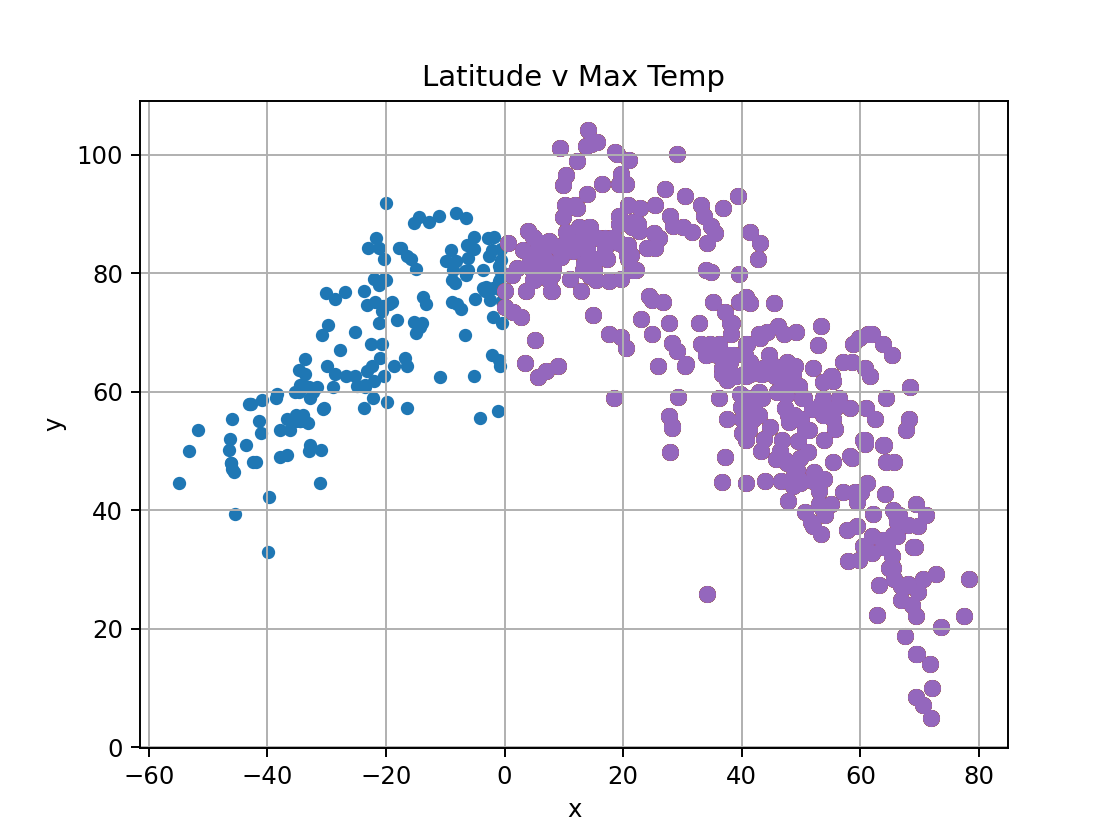

In [81]:
#Scatter plot using pandas
df.plot(kind='scatter',x='Lat', y='Max Temp', grid=True, title="Latitude v Max Temp")
plt.show()
#add dynamic date to scatter plot title

In [61]:
#Scatter plot using matplotlib


plt.scatter(x, y)
plt.title('Latitude v Max Temp')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# fig=plt.figure()
# ax=fig.add_axes([0,0,1,1])
# ax.scatter(grades_range, girls_grades, color='r')
# ax.scatter(grades_range, boys_grades, color='b')
# ax.set_xlabel('Grades Range')
# ax.set_ylabel('Grades Scored')
# ax.set_title('scatter plot')
# plt.show()
# plt.scatter(x='Lat', y='Max Temp')

In [62]:
#Calculating the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x* slope + intercept

### Latitude vs. Humidity Plot

In [63]:
# #Converting dataframe columns to numeric to be able to pass as x, y params to scatter plot
# x=pd.to_numeric(output_data_file['Lat'])
# y=pd.to_numeric(output_data_file['Humidity'])

<IPython.core.display.Javascript object>


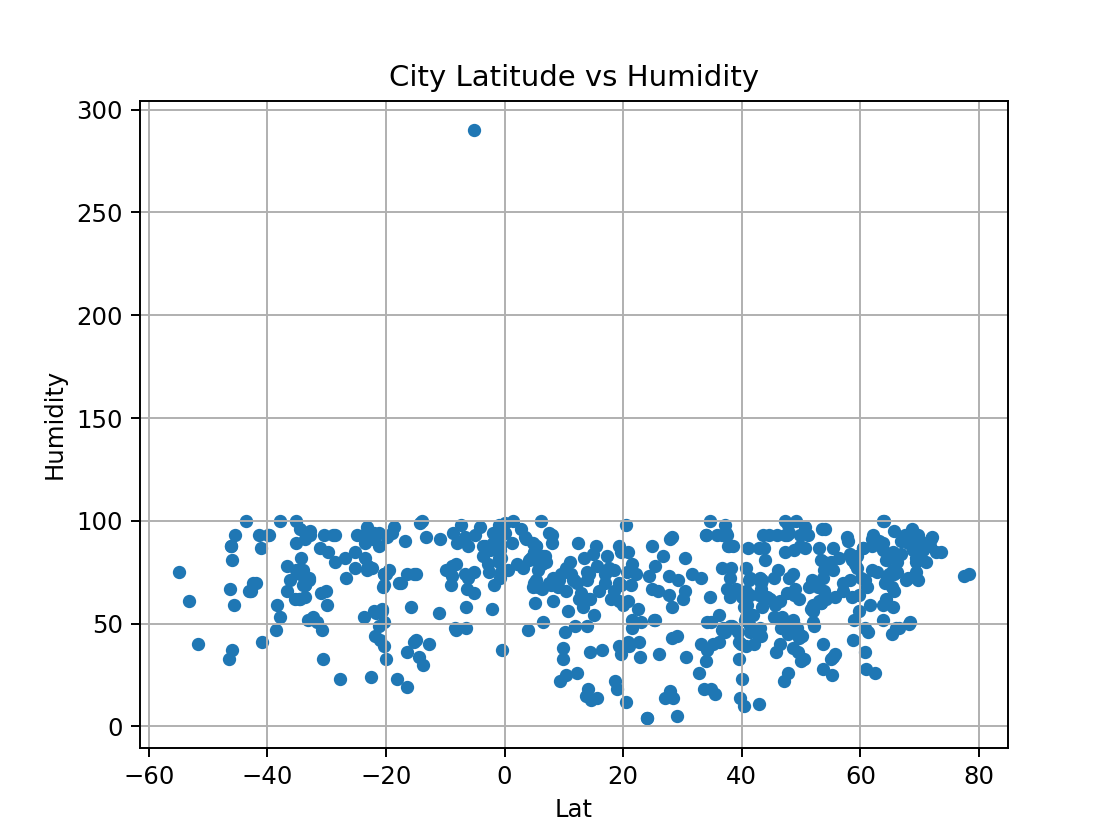

In [67]:
df.plot(kind='scatter', x='Lat', y='Humidity', grid=True, title='City Latitude vs Humidity')
plt.show()

### Latitude vs. Cloudiness Plot

In [75]:
# #Converts dataframe columns to numeric so they can be passed as x, y params to generate scatter plots
df['Lat']=pd.to_numeric(df['Lat'])
df['Cloud']=pd.to_numeric(df['Cloudiness'])

<IPython.core.display.Javascript object>


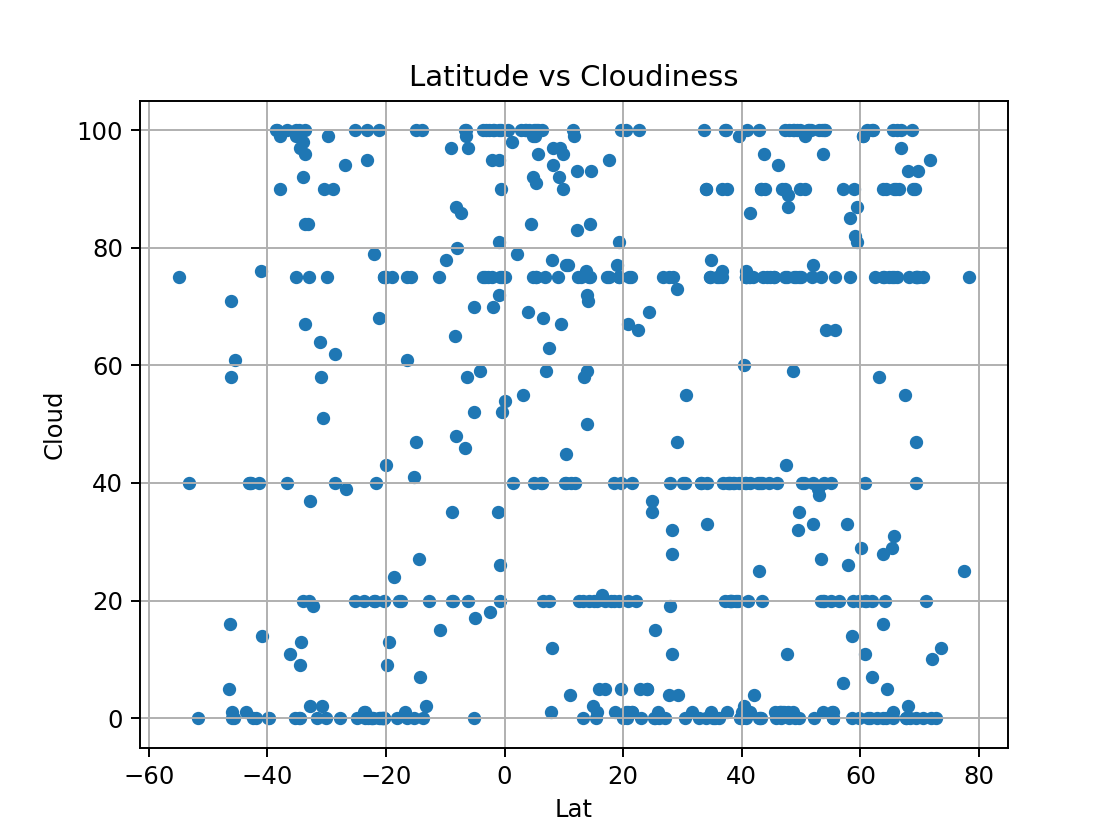

In [76]:
df.plot(kind='scatter', x='Lat' , y='Cloud', grid=True, title='Latitude vs Cloudiness')
plt.show()

### Latitude vs. Wind Speed Plot

In [77]:
df['Lat']=pd.to_numeric(df['Lat'])

df['Wind Speed']=pd.to_numeric(df['Wind Speed'])

<IPython.core.display.Javascript object>


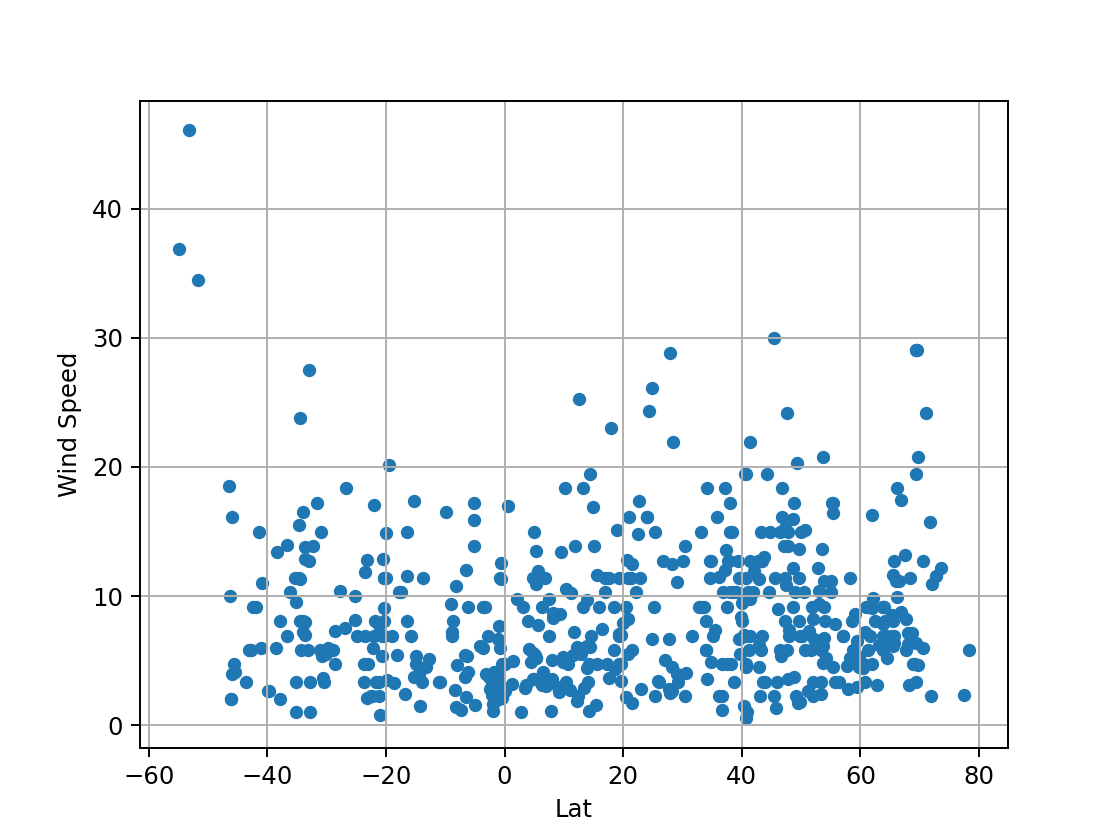

In [78]:
df.plot.scatter(x='Lat', y='Wind Speed', grid=True)
plt.show()

## Linear Regression

### Write linear regression plot function (optional)

In [91]:
#Create 2 new dfs sorted based on lat values
df_nh=df.loc[df["Lat"]>0]
#print(df_nh)
df_sh=df.loc[df["Lat"]<0]
#print(df_sh)

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [92]:
x=pd.to_numeric(df_nh['Lat'])
y=pd.to_numeric(df_nh['Max Temp'])

In [93]:
plt.scatter(x, y)
plt.title('Latitude v Max Temp')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression